# Machine Learning: Classification

In [97]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix


In [25]:
permits = pd.read_csv('weeks7-8/ADU_permits.csv')

permits

,Assessor Book,Assessor Page,Assessor Parcel,# of Accessory Dwelling Units
0,2340.0,20.0,013,1.0
1,5535.0,34.0,001,1.0
2,2639.0,23.0,005,1.0
3,2276.0,18.0,028,1.0
4,4249.0,6.0,016,1.0
...,...,...,...,...
15736,6035.0,27.0,006,1.0
15737,2345.0,11.0,006,1.0
15738,2686.0,4.0,017,1.0
15739,5084.0,26.0,009,5.0


In [3]:
parcels = pd.read_csv('weeks7-8/parcels.csv')

parcels

,APN,UseType,UseDescription,YearBuilt1,Units1,Bedrooms1,Bathrooms1,SQFTmain1,Roll_LandValue,Roll_ImpValue,Roll_LandBaseYear,Roll_ImpBaseYear,CENTER_LAT,CENTER_LON
0,2004-001-003,Residential,Single,1973.0,1.0,4.0,3.0,2090.0,543000.0,231000.0,2006,2006,34.220220,-118.620669
1,2004-001-004,Residential,Single,1973.0,1.0,5.0,3.0,2479.0,345587.0,238650.0,2010,2010,34.220039,-118.620668
2,2004-001-005,Residential,Single,1973.0,1.0,4.0,2.0,2057.0,490917.0,185207.0,2018,2018,34.219858,-118.620676
3,2004-001-008,Residential,Single,1978.0,1.0,4.0,3.0,2423.0,119775.0,207020.0,1980,1980,34.220334,-118.622706
4,2004-001-009,Residential,Single,1978.0,1.0,4.0,3.0,2226.0,130511.0,195871.0,1984,1984,34.220323,-118.623050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789177,7563-037-053,Residential,Single,1965.0,1.0,3.0,2.0,2206.0,743000.0,182000.0,2006,2006,33.719947,-118.325116
789178,7563-037-054,Residential,Single,1959.0,1.0,3.0,2.0,1862.0,656246.0,164055.0,2008,2008,33.720115,-118.325069
789179,7563-037-055,Residential,Single,1962.0,1.0,4.0,2.0,2153.0,44564.0,86731.0,1975,1975,33.720274,-118.325022
789180,8028-013-011,Residential,Two Units,1901.0,1.0,2.0,1.0,1115.0,113921.0,183735.0,1988,1988,33.921639,-118.043151


## Merging data

Note that the `APN` column in `parcels` has a format that corresponds to three columns in `permits`: `Assessor Book`-`Assessor Page`-`Assessor Parcel`. 

In [26]:
def get_apn(row):
    book = row['Assessor Book'].astype(str).split('.')[0]
    page = row['Assessor Page'].astype(str).split('.')[0]
    parcel = row['Assessor Parcel'].astype(str)
    return '-'.join([book, page, parcel])

In [27]:
permits = permits[permits['Assessor Parcel']!="***"]

In [50]:
permits['APN_1'] = permits['Assessor Book'].astype(int).astype(str).str.zfill(4)
permits['APN_2'] = permits['Assessor Page'].astype(int).astype(str).str.zfill(3)
permits['APN_3'] = permits['Assessor Parcel'].astype(str).str.zfill(3)

permits['APN'] = permits[['APN_1','APN_2', 'APN_3']].agg('-'.join, axis=1)

<ipython-input-50-f910e2856cba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  permits['APN_1'] = permits['Assessor Book'].astype(int).astype(str).str.zfill(4)
<ipython-input-50-f910e2856cba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  permits['APN_2'] = permits['Assessor Page'].astype(int).astype(str).str.zfill(3)
<ipython-input-50-f910e2856cba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [51]:
permits_join = permits[['APN', '# of Accessory Dwelling Units']]

In [58]:
permits_join.groupby('APN').size().sort_values(ascending=False)

APN
5084-026-009    5
5588-023-019    4
2204-025-027    3
5542-022-025    3
5089-019-035    3
               ..
2365-005-006    1
2365-005-007    1
2365-009-011    1
2365-009-018    1
7563-022-008    1
Length: 15348, dtype: int64

In [71]:
permits_join = permits_join.drop_duplicates('APN')

permits_join.shape

(15348, 2)

In [72]:
parcels.groupby('APN').size().sort_values(ascending=False)

APN
2004-001-003    1
5139-005-028    1
5138-027-197    1
5138-027-198    1
5138-027-199    1
               ..
2662-018-004    1
2662-018-005    1
2662-018-006    1
2662-018-007    1
8543-009-073    1
Length: 789156, dtype: int64

In [73]:
parcels = parcels.drop_duplicates('APN')

parcels.shape

(789156, 14)

In [77]:
merged = parcels.merge(permits_join, on='APN', how='left', indicator=True)

merged

,APN,UseType,UseDescription,YearBuilt1,Units1,Bedrooms1,Bathrooms1,SQFTmain1,Roll_LandValue,Roll_ImpValue,Roll_LandBaseYear,Roll_ImpBaseYear,CENTER_LAT,CENTER_LON,# of Accessory Dwelling Units,_merge
0,2004-001-003,Residential,Single,1973.0,1.0,4.0,3.0,2090.0,543000.0,231000.0,2006,2006,34.220220,-118.620669,NaN,left_only
1,2004-001-004,Residential,Single,1973.0,1.0,5.0,3.0,2479.0,345587.0,238650.0,2010,2010,34.220039,-118.620668,NaN,left_only
2,2004-001-005,Residential,Single,1973.0,1.0,4.0,2.0,2057.0,490917.0,185207.0,2018,2018,34.219858,-118.620676,NaN,left_only
3,2004-001-008,Residential,Single,1978.0,1.0,4.0,3.0,2423.0,119775.0,207020.0,1980,1980,34.220334,-118.622706,NaN,left_only
4,2004-001-009,Residential,Single,1978.0,1.0,4.0,3.0,2226.0,130511.0,195871.0,1984,1984,34.220323,-118.623050,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789151,7563-037-053,Residential,Single,1965.0,1.0,3.0,2.0,2206.0,743000.0,182000.0,2006,2006,33.719947,-118.325116,NaN,left_only
789152,7563-037-054,Residential,Single,1959.0,1.0,3.0,2.0,1862.0,656246.0,164055.0,2008,2008,33.720115,-118.325069,NaN,left_only
789153,7563-037-055,Residential,Single,1962.0,1.0,4.0,2.0,2153.0,44564.0,86731.0,1975,1975,33.720274,-118.325022,NaN,left_only
789154,8028-013-011,Residential,Two Units,1901.0,1.0,2.0,1.0,1115.0,113921.0,183735.0,1988,1988,33.921639,-118.043151,NaN,left_only


In [78]:
merged['_merge'].value_counts()

left_only     774014
both           15142
right_only         0
Name: _merge, dtype: int64

In [80]:
merged = merged.rename(columns={'_merge': 'has_ADU'})
merged['has_ADU'] = merged['has_ADU'].replace({'left_only': False,
                                               'both': True})

## Train-test split

We want to predict if a parcel has ADU or not, based on the attributes of parcel:
* `y` = `has_ADU`
* `X` = `['SQFTmain1', 'Roll_LandValue', 'Roll_ImpValue']`

In [85]:
y_col = 'has_ADU'
x_cols = ['SQFTmain1', 'Roll_LandValue', 'Roll_ImpValue']

df_to_fit = merged[[y_col] + x_cols].dropna()
X_train, X_test, y_train, y_test = train_test_split(df_to_fit[x_cols], 
                                                    df_to_fit[y_col], 
                                                    test_size = 0.25, 
                                                    random_state = 1)

In [86]:
print(f'Training sample: X = {len(X_train)}, y = {len(y_train)}')
print(f'Test sample: X = {len(X_test)}, y = {len(y_test)}')

Training sample: X = 581968, y = 581968
Test sample: X = 193990, y = 193990


## Random forest classification

In [88]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 1)

In [89]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [90]:
y_pred = rf.predict(X_test)

In [96]:
print(f'Predicted % has_ADU == True: {y_pred.mean()}')
print(f'Actual % has_ADU == True: {y_test.mean()}')

Predicted % has_ADU == True: 0.00020104129078818496
Actual % has_ADU == True: 0.019366977679261817


### Evaluating the model

* confusion matrix
* accuracy score 
* classification report: 
    * precision = TP / (TP + FP)
    * recall = TP / (TP + FN)
   

In [99]:
confusion_matrix(y_test, y_pred)

array([[190195,     38],
       [  3756,      1]])

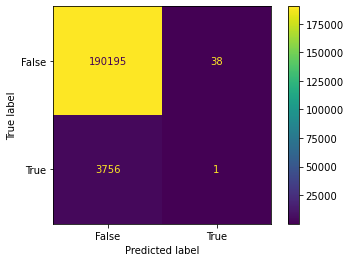

In [103]:
plot_confusion_matrix(rf, X_test, y_test)

In [100]:
accuracy_score(y_test, y_pred)

0.980442290839734

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    190233
        True       0.03      0.00      0.00      3757

    accuracy                           0.98    193990
   macro avg       0.50      0.50      0.50    193990
weighted avg       0.96      0.98      0.97    193990



### How to improve the model?

* convert categorical vars to dummies

In [106]:
dummies1 = pd.get_dummies(merged.UseType, prefix='usetype_') 
dummies2 = pd.get_dummies(merged.UseDescription, prefix='usedesc_')

In [107]:
merged = merged.join(dummies1).join(dummies2)

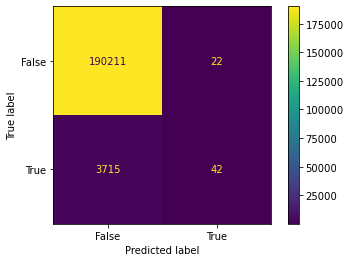

In [109]:
xvars = (dummies1.columns.tolist() + dummies2.columns.tolist() + 
            ['YearBuilt1', 'Units1', 'Bedrooms1', 'Bathrooms1', 'SQFTmain1', 'Roll_LandValue', 
             'Roll_ImpValue', 'Roll_LandBaseYear', 'Roll_ImpBaseYear', 'CENTER_LAT', 'CENTER_LON' ])
yvar = 'has_ADU'

# create a dataframe with no NaNs
df_to_fit = merged[xvars+[yvar]].dropna()

X_train, X_test, y_train, y_test = train_test_split(df_to_fit[xvars], df_to_fit[yvar], test_size = 0.25, random_state = 1)

rf = RandomForestClassifier(n_estimators = 100, random_state = 1, n_jobs=-1) # n_jobs uses all your computer's cores

# now fit the model
rf.fit(X_train, y_train)

plot_confusion_matrix(rf, X_test, y_test)

### Factors affecting ADUs

* feature importance: MDI (mean decrease in impurity)

Text(0, 0.5, 'Mean decrease in impurity')

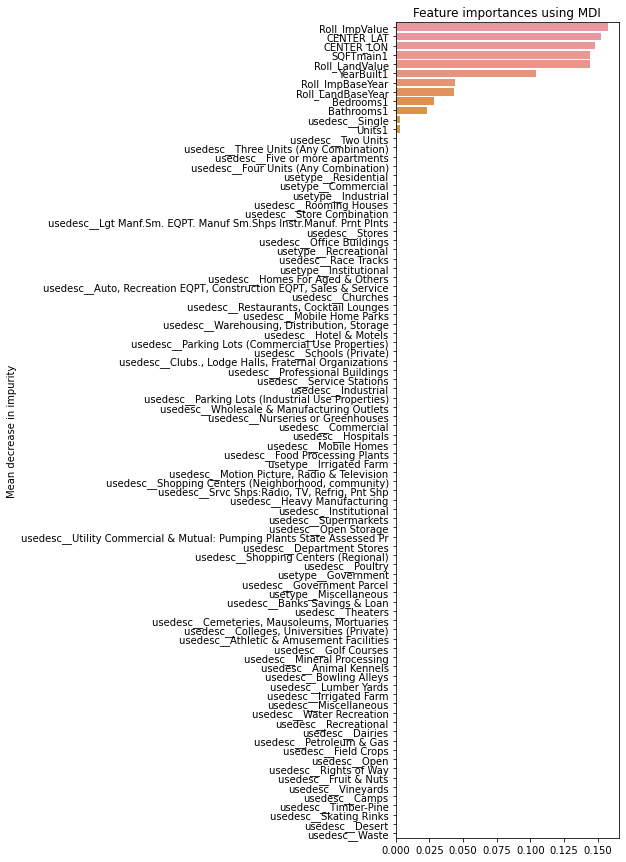

In [113]:
import numpy as np
import seaborn as sns

importances = rf.feature_importances_

# convert to a series, and give the index labels from our X_train dataframe
forest_importances = pd.Series(importances, index=X_train.columns)

# get the standard deviations to be able to plot the error bars
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# sort the importances in descending order
forest_importances.sort_values(inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(4,15))
sns.barplot(x=forest_importances.values, y=forest_importances.index, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

### Plotting random forest tree

limit the levels of the tree with `max_depth`

* The first line of each box is the decision criterion
* *Samples* gives the number of observations at each node on the tree
* *Values* gives the outcome (*y*) values, i.e. the number of parcels with and without an ADU

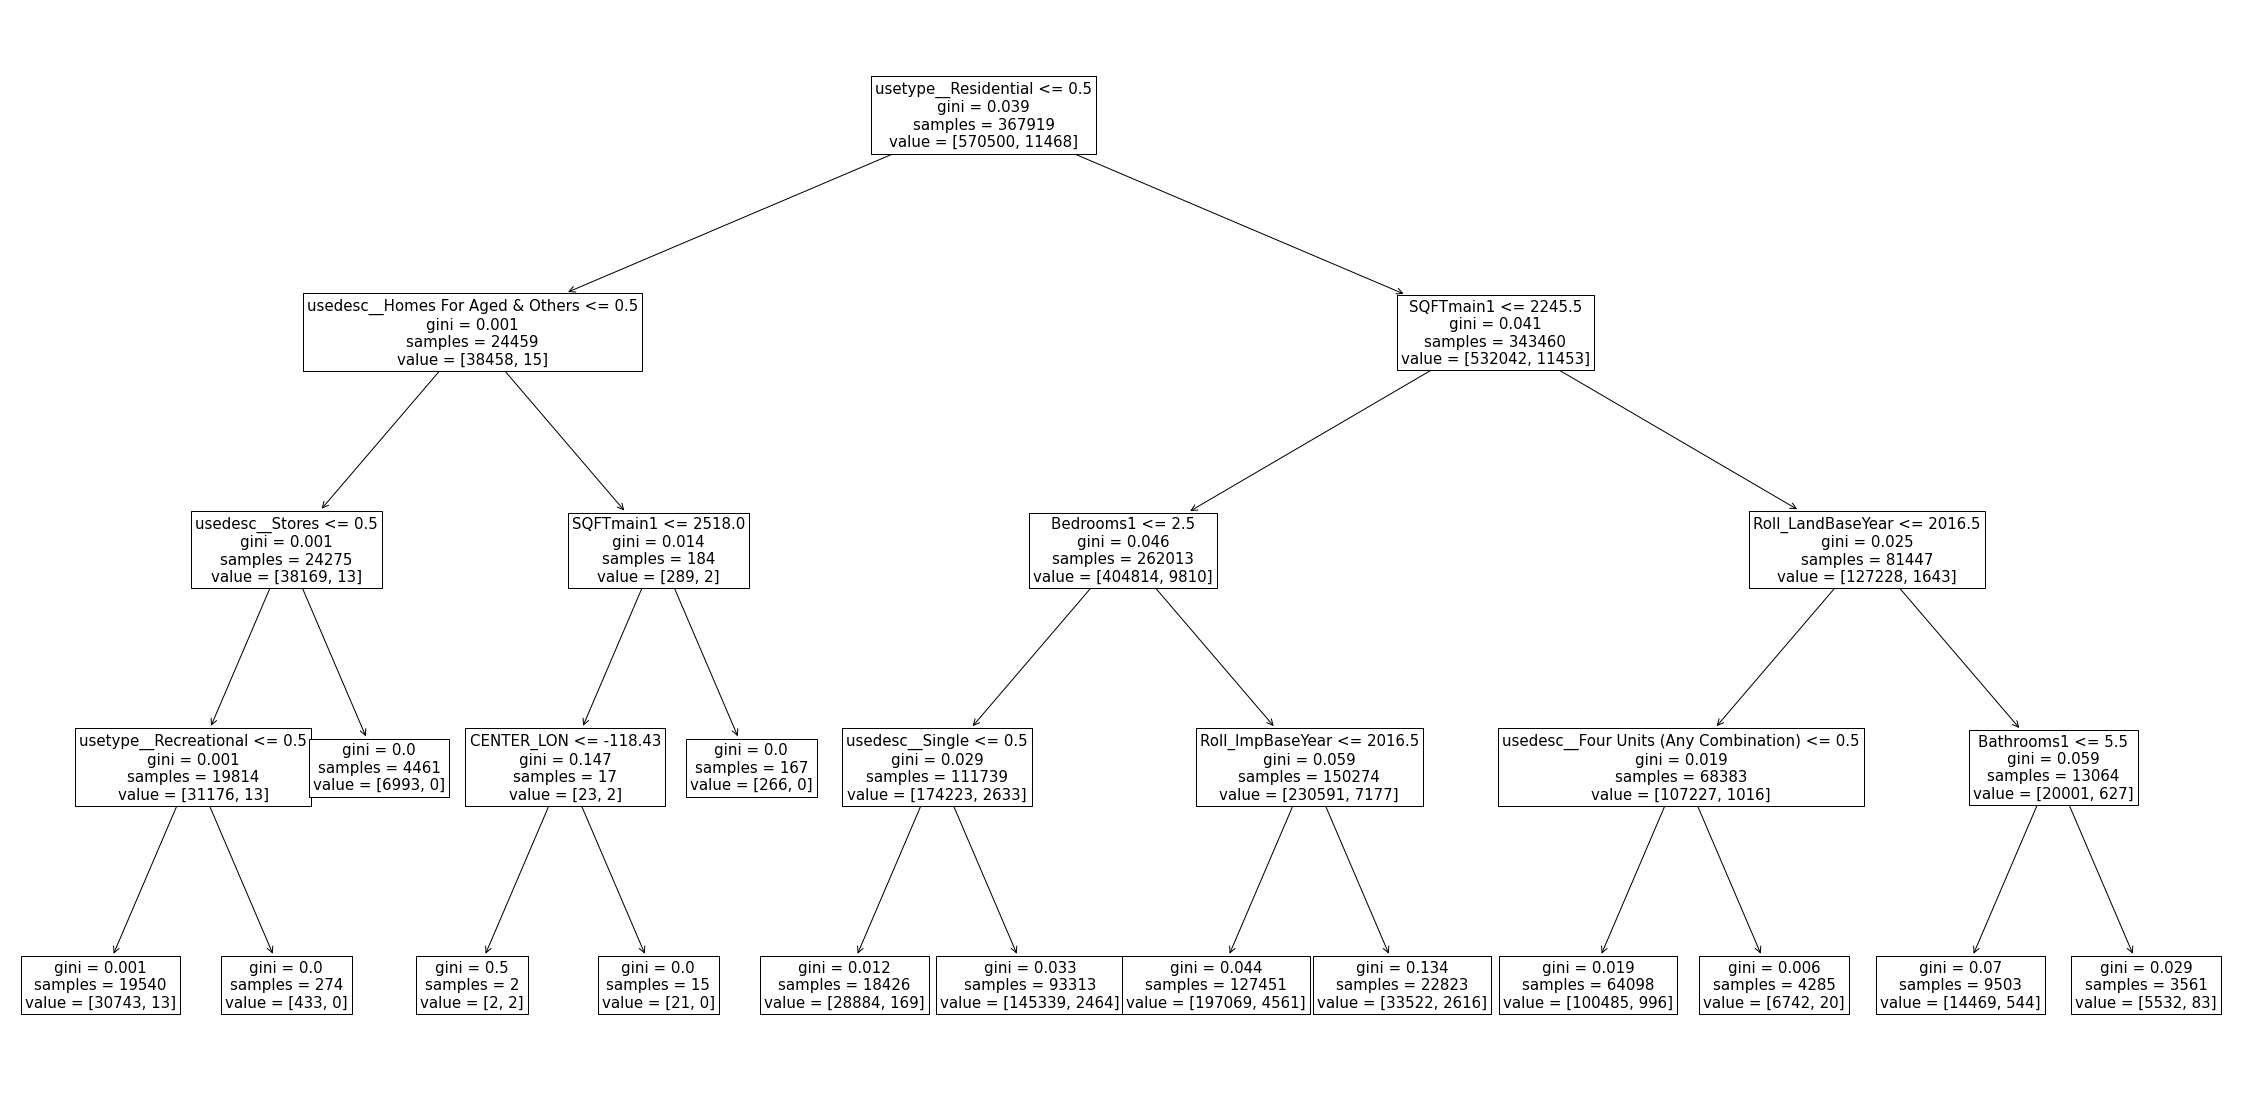

In [116]:
# same as before, but with max_depth=4
rf = RandomForestClassifier(n_estimators = 50, random_state = 1, n_jobs=-1, max_depth=4) 
rf.fit(X_train, y_train)

# now we have 100 estimators (trees), so let's pick the first one to visualize
e = rf.estimators_[0]

from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,20))  
_ = tree.plot_tree(e, feature_names = X_train.columns, fontsize=15, ax = ax)

## Neural networks

In [122]:
from sklearn import preprocessing

dummyCols = [col for col in df_to_fit.columns if col.startswith('usetype_') or col.startswith('usedesc_') or col=='has_ADU']
otherCols = [col for col in df_to_fit.columns if col not in dummyCols]

scaler = preprocessing.StandardScaler().fit(df_to_fit[otherCols])

# the scaler returns a numpy array, so we cast this as a DataFrame and need to specify the column names and index
df_scaled = pd.DataFrame(scaler.transform(df_to_fit[otherCols]), columns=otherCols, index=df_to_fit.index)
df_scaled = df_scaled.join(df_to_fit[dummyCols])

df_scaled


,YearBuilt1,Units1,Bedrooms1,Bathrooms1,SQFTmain1,Roll_LandValue,Roll_ImpValue,Roll_LandBaseYear,Roll_ImpBaseYear,CENTER_LAT,...,usedesc__Three Units (Any Combination),usedesc__Timber-Pine,usedesc__Two Units,usedesc__Utility Commercial & Mutual: Pumping Plants State Assessed Pr,usedesc__Vineyards,"usedesc__Warehousing, Distribution, Storage",usedesc__Waste,usedesc__Water Recreation,usedesc__Wholesale & Manufacturing Outlets,has_ADU
0,0.202211,-0.099709,0.112107,0.049349,-0.069543,0.061642,-0.033290,0.287143,0.253705,1.018674,...,0,0,0,0,0,0,0,0,0,False
1,0.202211,-0.099709,0.310558,0.049349,-0.040085,-0.075611,-0.031615,0.522317,0.467468,1.017200,...,0,0,0,0,0,0,0,0,0,False
2,0.202211,-0.099709,0.112107,-0.145974,-0.072042,0.025431,-0.043322,0.992664,0.894995,1.015719,...,0,0,0,0,0,0,0,0,0,False
3,0.235640,-0.099709,0.112107,0.049349,-0.044325,-0.232608,-0.038543,-1.241484,-1.135758,1.019604,...,0,0,0,0,0,0,0,0,0,False
4,0.235640,-0.099709,0.112107,0.049349,-0.059244,-0.225143,-0.040986,-1.006311,-0.921995,1.019513,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789151,0.148724,-0.099709,-0.086344,-0.145974,-0.060759,0.200693,-0.044024,0.287143,0.253705,-3.063638,...,0,0,0,0,0,0,0,0,0,False
789152,0.108609,-0.099709,-0.086344,-0.145974,-0.086809,0.140377,-0.047955,0.404730,0.360586,-3.062271,...,0,0,0,0,0,0,0,0,0,False
789153,0.128667,-0.099709,0.112107,-0.145974,-0.064772,-0.284898,-0.064894,-1.535451,-1.402963,-3.060969,...,0,0,0,0,0,0,0,0,0,False
789154,-0.279168,-0.099709,-0.284796,-0.341297,-0.143379,-0.236678,-0.043644,-0.771137,-0.708231,-1.417799,...,0,0,1,0,0,0,0,0,0,False


### Train test split

In [134]:
# split into train/test as before
X_train, X_test, y_train, y_test = train_test_split(df_scaled[xvars], 
                                                    df_scaled[yvar], 
                                                    test_size = 0.25, 
                                                    random_state = 1)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [135]:
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    190233
        True       0.00      0.00      0.00      3757

    accuracy                           0.98    193990
   macro avg       0.49      0.50      0.50    193990
weighted avg       0.96      0.98      0.97    193990



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


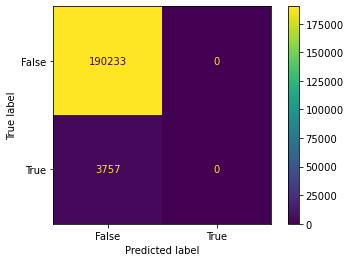

In [136]:
plot_confusion_matrix(mlp, X_test, y_test)

## Logistic regression

In [137]:
from sklearn.linear_model import LogisticRegression

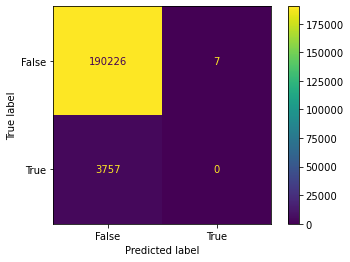

In [138]:
xvars = ['YearBuilt1', 'Units1', 'Bedrooms1', 'Bathrooms1', 
         'SQFTmain1', 'Roll_LandValue', 'Roll_ImpValue', 'Roll_LandBaseYear', 
         'Roll_ImpBaseYear', 'CENTER_LAT', 'CENTER_LON', 'usedesc__Single']

lr = LogisticRegression()
lr.fit(X_train[xvars], y_train)
plot_confusion_matrix(lr, X_test[xvars], y_test)